In [1]:
import pandas as pd

In [2]:
# Load the full dataset
bank_dataset = pd.read_csv("A2-bank/bank-additional.csv", sep=";")

# Print the first few rows of the dataset
bank_dataset.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
# Print the size of the dataset
print("Size of the dataset: ", bank_dataset.shape)

# Print the data types of the features
print("\nData types of the features:")
print(bank_dataset.dtypes)

# Count the number of "unknown" values in each column
unknown_counts = bank_dataset.apply(lambda x: x[x == 'unknown'].count(), axis=0)
print("\nNumber of 'unknown' values in each column:")
print(unknown_counts[unknown_counts > 0])


Size of the dataset:  (4119, 21)

Data types of the features:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Number of 'unknown' values in each column:
job           39
marital       11
education    167
default      803
housing      105
loan         105
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder

# Replace 'unknown' with the most frequent value in each column
for column in bank_dataset.columns:
    most_frequent = bank_dataset[column].mode()[0]
    bank_dataset[column] = bank_dataset[column].replace('unknown', most_frequent)

# Convert categorical features into numerical form using label encoding
for column in bank_dataset.columns:
    if bank_dataset[column].dtype == 'object':
        le = LabelEncoder()
        bank_dataset[column] = le.fit_transform(bank_dataset[column])

# Print the first few rows of the preprocessed dataset
bank_dataset.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,1,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,1,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,0,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,1,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [5]:
# Split the dataset into features (X) and target variable (y)
X_bank = bank_dataset.drop('y', axis=1)
y_bank = bank_dataset['y']

# Calculate the split index
split_idx = int(0.8 * len(X_bank))

# Split the dataset into a training set and a test set
X_train_bank = X_bank[:split_idx]
y_train_bank = y_bank[:split_idx]
X_test_bank = X_bank[split_idx:]
y_test_bank = y_bank[split_idx:]

# Print the sizes of the training set and test set
print("Size of the training set: ", X_train_bank.shape[0])
print("Size of the test set: ", X_test_bank.shape[0])


Size of the training set:  3295
Size of the test set:  824


In [6]:
# Print the size of the dataset
print("Size of the dataset: ", bank_dataset.shape)

# Print the data types of the features
print("\nData types of the features:")
print(bank_dataset.dtypes)

# Count the number of "unknown" values in each column
unknown_counts = bank_dataset.apply(lambda x: x[x == 'unknown'].count(), axis=0)
print("\nNumber of 'unknown' values in each column:")
print(unknown_counts[unknown_counts > 0])


Size of the dataset:  (4119, 21)

Data types of the features:
age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

Number of 'unknown' values in each column:
Series([], dtype: int64)


In [7]:
from sklearn.preprocessing import LabelEncoder

# Replace 'unknown' with the most frequent value in each column
for column in bank_dataset.columns:
    most_frequent = bank_dataset[column].mode()[0]
    bank_dataset[column] = bank_dataset[column].replace('unknown', most_frequent)

# Convert categorical features into numerical form using label encoding
for column in bank_dataset.columns:
    if bank_dataset[column].dtype == 'object':
        le = LabelEncoder()
        bank_dataset[column] = le.fit_transform(bank_dataset[column])

# Print the first few rows of the preprocessed dataset
bank_dataset.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,1,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,1,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,0,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,1,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Function to calculate classification error
def classification_error(y_true, y_pred):
    return 100 * (sum(y_true != y_pred) / len(y_true))

# Function to apply SVM to the given dataset and print the classification error, confusion matrix, and ROC AUC score
def apply_svm(X_train, y_train, X_test, y_test, cv=True):
    """
    Apply SVM to the given dataset and print the classification error, confusion matrix, and ROC AUC score.
    The function supports skipping cross-validation by setting cv=3.
    """
    # Create an SVM classifier with 'rbf' kernel
    svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=0)
    
    if cv:
        # Set a grid for the 'C' and 'gamma' parameters
        param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001]}

        # Perform cross-validation to find best parameters
        grid = GridSearchCV(svm, param_grid, cv=3)
        grid.fit(X_train, y_train)

        # Print best parameters
        print("Best parameters: ", grid.best_params_)

        # Use the SVM classifier with best parameters
        svm = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], probability=True, random_state=0)
    
    # Train the SVM classifier
    svm.fit(X_train, y_train)

    # Predict the targets for the test set
    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)[:,1]

    # Print the classification error
    print("\nClassification error: {:.2f}%".format(classification_error(y_test, y_pred)))

    # Print the confusion matrix
    print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

    # Calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    print("\nROC AUC score: {:.2f}".format(roc_auc))
    
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    return svm
 
# Apply SVM to the Bank Marketing dataset with default parameters (without cross-validation)
print("Bank Marketing Dataset")
svm_bank = apply_svm(X_train_bank, y_train_bank, X_test_bank, y_test_bank, cv=False)



Bank Marketing Dataset

Classification error: 9.83%

Confusion matrix:
 [[726  18]
 [ 63  17]]

ROC AUC score: 0.90
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       744
           1       0.49      0.21      0.30        80

    accuracy                           0.90       824
   macro avg       0.70      0.59      0.62       824
weighted avg       0.88      0.90      0.88       824



Part 2.1: Parameter Selection

In [9]:
# Apply cross-validation for SVM on the Bank Marketing dataset
print("\nBank Marketing Dataset - SVM")
# svm_bank_cv = apply_svm(X_train_bank, y_train_bank, X_test_bank, y_test_bank, cv=5)
svm_bank_cv = apply_svm(X_train_bank, y_train_bank, X_test_bank, y_test_bank, cv=1)



Bank Marketing Dataset - SVM


KeyboardInterrupt: 

In [ ]:
svm_bank_cv = apply_svm(X_train_bank, y_train_bank, X_test_bank, y_test_bank, cv=2)

Part 2.2: Evaluation of the Results 
Compute the classification error

In [15]:
# Compute the classification error for SVM on the Test and Validation sets
print("\nBank Marketing Dataset - SVM")
print("Test Set")
classification_error_svm_test = classification_error(y_test_bank, svm_bank.predict(X_test_bank))
print(f"Classification Error on Test Set: {classification_error_svm_test:.2f}%")

print("\nValidation Set (using cross-validation)")
classification_error_svm_cv = classification_error(y_test_bank, svm_bank_cv.predict(X_test_bank))
print(f"Classification Error on Validation Set: {classification_error_svm_cv:.2f}%")



Bank Marketing Dataset - SVM
Test Set
Classification Error on Test Set: 9.83%

Validation Set (using cross-validation)
Classification Error on Validation Set: 10.56%


Compute and compare the confusion matrices

In [ ]:
# Confusion matrix for SVM on Test Set
print("\nConfusion Matrix for SVM on Test Set")
confusion_matrix_svm_test = confusion_matrix(y_test_bank, svm_bank.predict(X_test_bank))
print(confusion_matrix_svm_test)

# Confusion matrix for SVM on Validation Set
print("\nConfusion Matrix for SVM on Validation Set (using cross-validation)")
confusion_matrix_svm_cv = confusion_matrix(y_test_bank, svm_bank_cv.predict(X_test_bank))
print(confusion_matrix_svm_cv)



Confusion Matrix for SVM on Test Set
[[726  18]
 [ 63  17]]

Confusion Matrix for SVM on Validation Set (using cross-validation)
[[718  26]
 [ 61  19]]


In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Function to plot ROC curve
def plot_roc_curve_custom(model, X_test, y_test):
    y_prob = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


Bank Marketing Dataset

Classification error: 9.83%

Confusion matrix:
 [[726  18]
 [ 63  17]]

ROC AUC score: 0.90
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       744
           1       0.49      0.21      0.30        80

    accuracy                           0.90       824
   macro avg       0.70      0.59      0.62       824
weighted avg       0.88      0.90      0.88       824


Metrics for Bank Marketing Dataset:
Accuracy: 0.9016990291262136
AUC: 0.8987567204301076
Confusion Matrix:
[[726  18]
 [ 63  17]]
Classification Error: 0.09830097087378642

Bank Marketing Dataset - SVM with Cross-validation
Best parameters:  {'C': 1, 'gamma': 0.001}

Classification error: 10.56%

Confusion matrix:
 [[718  26]
 [ 61  19]]

ROC AUC score: 0.87
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       744
           1       0.42      0.24      

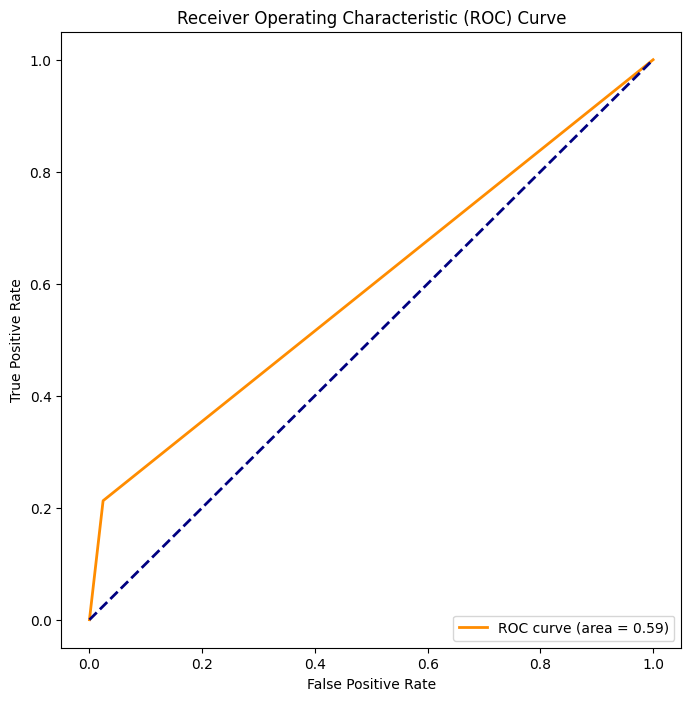

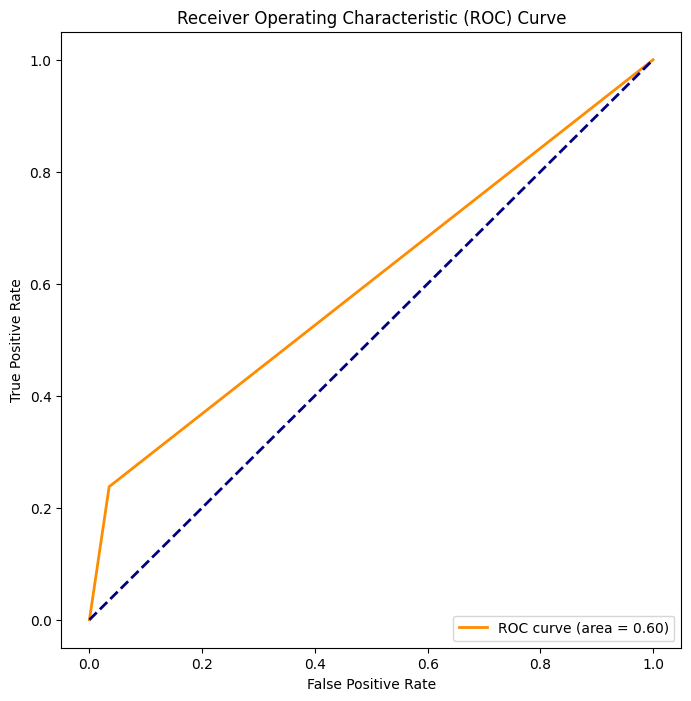

In [14]:
from sklearn.metrics import accuracy_score

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, y_prob, name):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)

    print(f"\nMetrics for {name} Dataset:")
    print("Accuracy:", accuracy)
    print("AUC:", roc_auc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Error:", 1 - accuracy)

# Apply SVM to Bank Marketing dataset
print("\nBank Marketing Dataset")
svm_bank = apply_svm(X_train_bank, y_train_bank, X_test_bank, y_test_bank, cv=False)
y_pred_bank = svm_bank.predict(X_test_bank)
y_prob_bank = svm_bank.predict_proba(X_test_bank)[:, 1]
print_metrics(y_test_bank, y_pred_bank, y_prob_bank, "Bank Marketing")

# Apply SVM to Bank Marketing dataset with cross-validation
print("\nBank Marketing Dataset - SVM with Cross-validation")
svm_bank_cv = apply_svm(X_train_bank, y_train_bank, X_test_bank, y_test_bank, cv=True)
y_pred_bank_cv = svm_bank_cv.predict(X_test_bank)
y_prob_bank_cv = svm_bank_cv.predict_proba(X_test_bank)[:, 1]
print_metrics(y_test_bank, y_pred_bank_cv, y_prob_bank_cv, "Bank Marketing")

# Plot ROC curve for Bank Marketing dataset
plot_roc_curve_custom(svm_bank, X_test_bank, y_test_bank)
plot_roc_curve_custom(svm_bank_cv, X_test_bank, y_test_bank)
